# Dithering
    
    
    .Dither is an intentionally applied form of noise used to randomize quantization error, preventing large-scale patterns such as color banding in images. (wikipedia)

In [1]:
from PIL import Image
from  math import floor

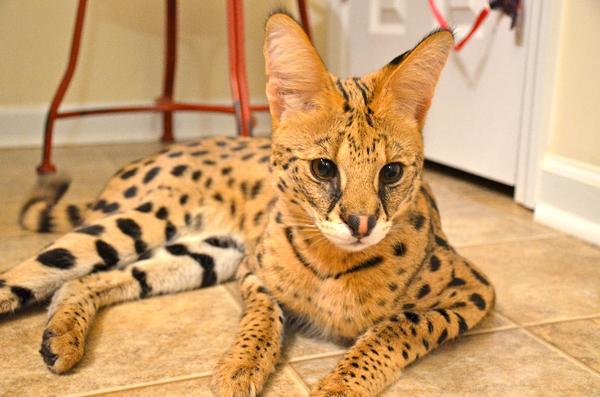

In [2]:
original_img = Image.open('./image.png')
original_img

In [3]:
original_img = original_img.convert('RGB')
pixel = original_img.load()
x_lim, y_lim = original_img.size

In [4]:
def apply_threshold(value):
    return 255*floor(value/128)

In [5]:
for y in range(1, y_lim):
    for x in range(1, x_lim):
        red_old_pix, green_old_pix, blue_old_pix = pixel[x,y]
        
        red_new_pix = apply_threshold(red_old_pix)
        green_new_pix = apply_threshold(green_old_pix)
        blue_new_pix = apply_threshold(blue_old_pix)
        
        pixel[x, y] = red_new_pix, green_new_pix, blue_new_pix
        
        red_error = red_old_pix - red_new_pix
        green_error = green_old_pix - green_new_pix
        blue_error = blue_old_pix - blue_new_pix
        
        if x < x_lim-1:
            red = pixel[x+1,y][0] + round(red_error * 7/16)
            green = pixel[x+1,y][1] + round(green_error * 7/16)
            blue = pixel[x+1,y][2] + round(blue_error * 7/16)
            
            pixel[x+1, y] = (red, green, blue)
        
        if x > 1 and  y < y_lim-1:
            red = pixel[x-1,y+1][0] + round(red_error * 3/16)
            green = pixel[x-1,y+1][1] + round(green_error * 3/16)
            blue = pixel[x-1,y+1][2] + round(blue_error * 3/16)
            
            pixel[x-1, y+1] = (red, green, blue)
        
        if y < y_lim-1:
            red = pixel[x,y+1][0] + round(red_error * 5/16)
            green = pixel[x,y+1][1] + round(green_error * 5/16)
            blue = pixel[x,y+1][2] + round(blue_error * 5/16)
            
            pixel[x, y+1] = (red, green, blue)
        
        if x < x_lim-1 and y < y_lim-1:
            red = pixel[x+1,y+1][0] + round(red_error * 1/16)
            green = pixel[x+1,y+1][1] + round(green_error * 1/16)
            blue = pixel[x+1,y+1][2] + round(blue_error * 1/16)
            
            pixel[x+1, y+1] = (red, green, blue)

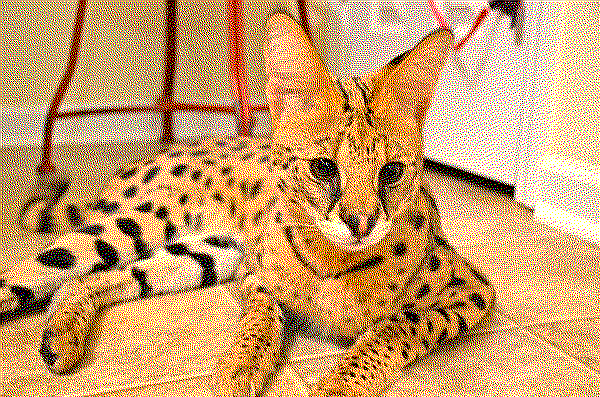

In [6]:
original_img